In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os 

In [20]:

DATASETS_PATH = os.path.join("datasets/" , 'archive')

def read_dataset(datasets=DATASETS_PATH):
    # Location of datasets file
    data = os.path.join(datasets , 'weatherHistory.csv')
    # Read Csv file with pandas
    return pd.read_csv(data)


datasets = read_dataset()
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [21]:
datasets.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Loud Cover'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >]],
      dtype=object)

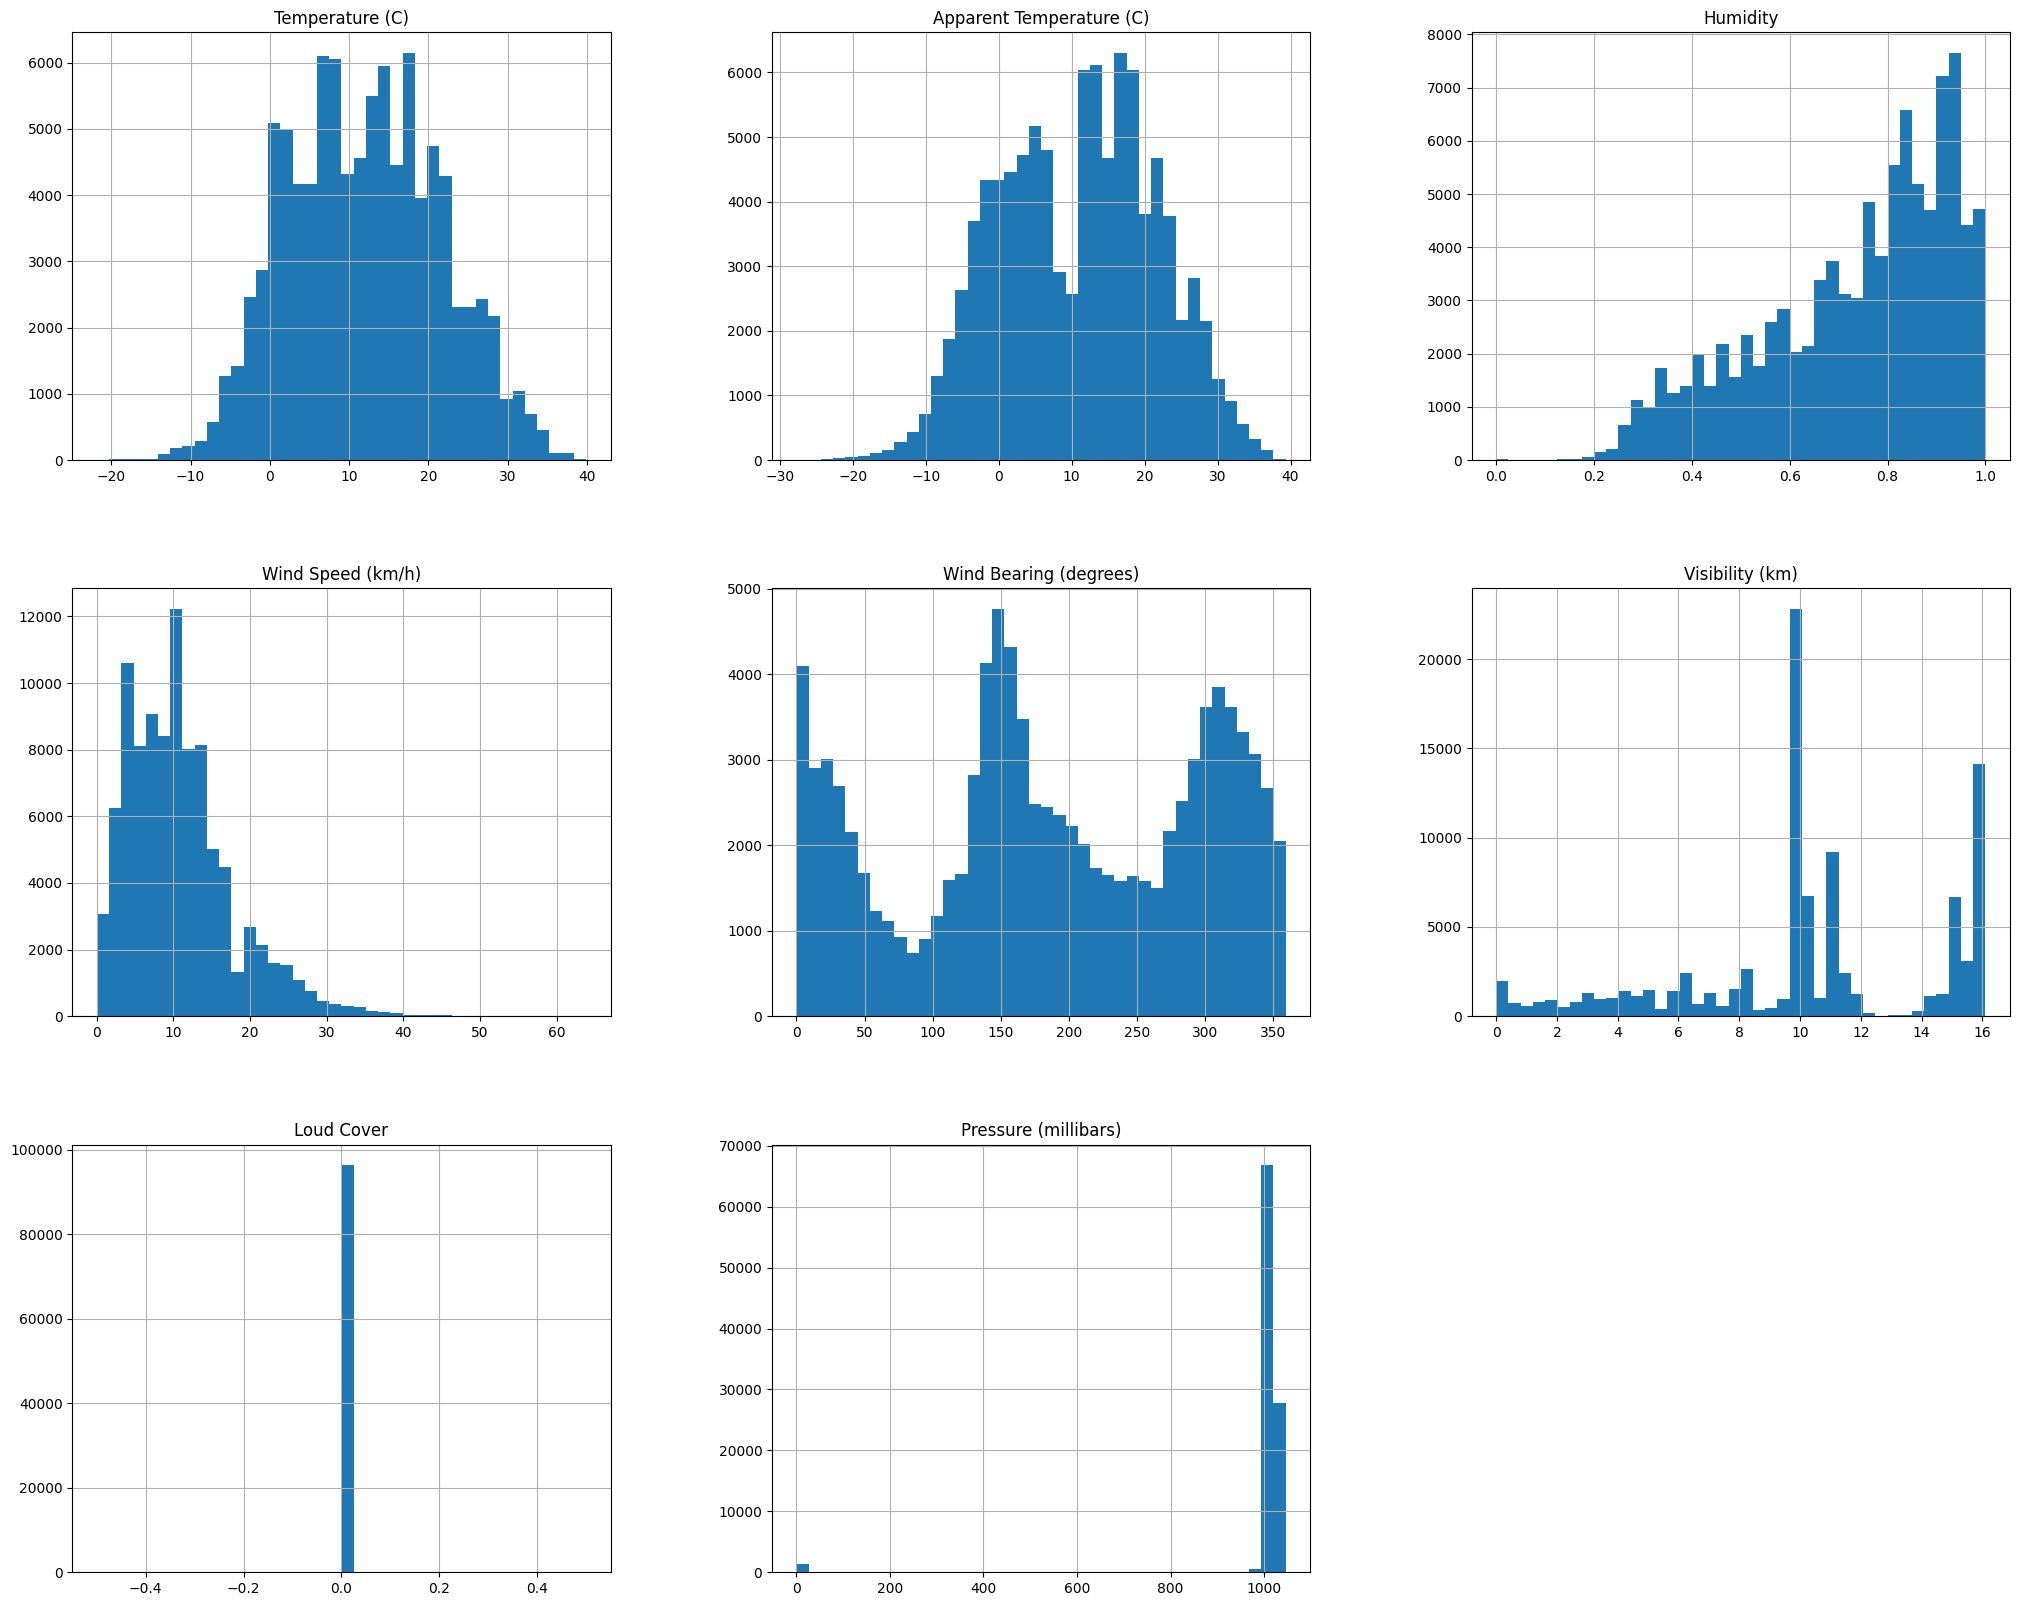

In [22]:
datasets.hist(bins=40 , figsize=(25,20))

In [27]:
train_test , test_set = train_test_split(datasets , test_size=0.2 , random_state=42)


<Axes: >

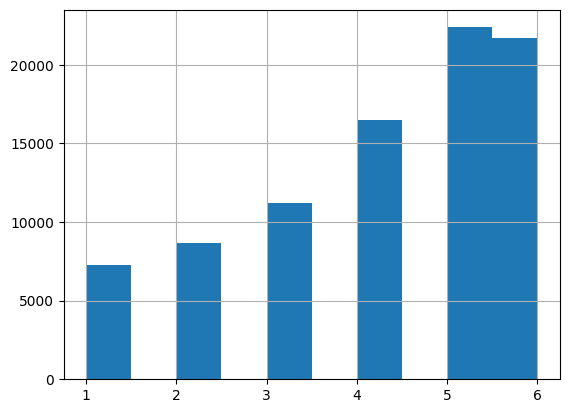

In [28]:
datasets["humidity"] = pd.cut(datasets["Humidity"] ,
                              bins=[0.4,0.5,0.6,0.7,0.8,0.9, 
                              np.inf] , labels=[1,2,3,4,5,6])

datasets["humidity"].hist()


In [18]:
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=42)
datasets["humidity"].fillna(datasets["humidity"].mode()[0], inplace=True)

for train_index , test_index in split.split(datasets , datasets["humidity"]):
    strat_test_set = datasets.loc[test_index]
    strat_train_set = datasets.loc[train_index]